In [1]:
# Using the titanic data, in your classification-exercises repository, create a notebook, 
# decision_tree.ipynb where you will do the following:

the baseline on the df 0.6161616161616161
the baseline on the train 0.6161048689138576


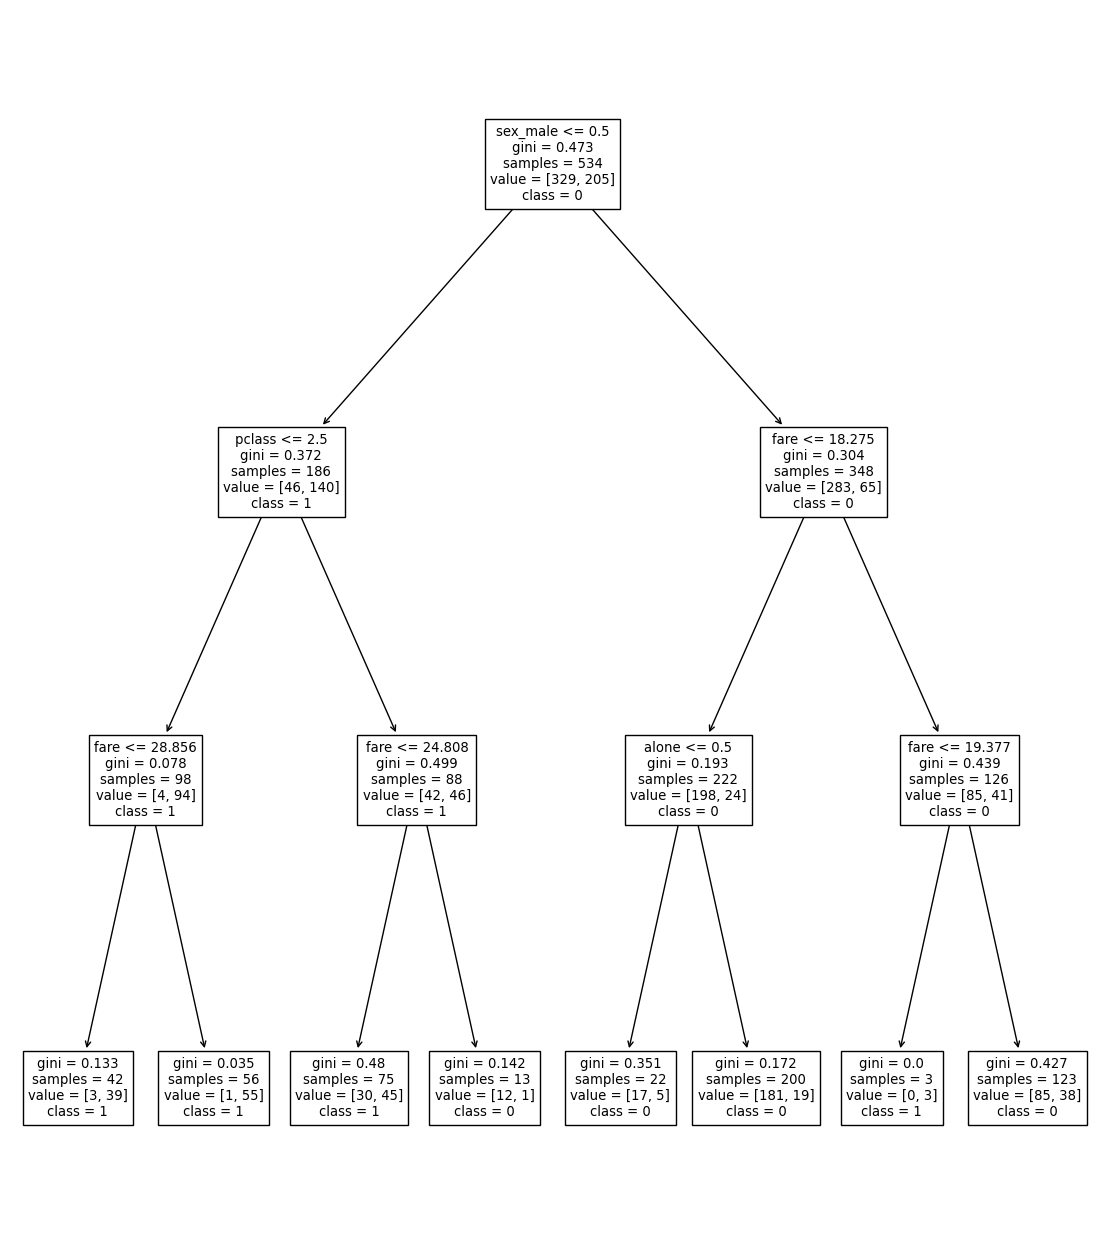

X_train, y_train 0.8183520599250936
X_validate, y_validate 0.7921348314606742
     0    1
0  295   34
1   63  142


,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,baseline
455,1,3,0,0,7.8958,1,1,0,0,0
380,1,1,0,0,227.5250,1,0,0,0,0
492,0,1,0,0,30.5000,1,1,0,1,0
55,1,1,0,0,35.5000,1,1,0,1,0
243,0,3,0,0,7.1250,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
695,0,2,0,0,13.5000,1,1,0,1,0
128,1,3,1,1,22.3583,0,0,0,0,0
636,0,3,0,0,7.9250,1,1,0,1,0
222,0,3,0,0,8.0500,1,1,0,1,0


In [46]:
### remember pd.concat( [  [df[col].iloc[:,:3]], [df[col].iloc[:,:3]] ], axis = 1)
##dont foget the axis = 1 and the brackets outside of iloc


# What is your baseline prediction? What is your baseline accuracy? 
import pandas as pd
import acquire
import prepare
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier


from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix


df = acquire.get_titanic_data()

df = prepare.prep_titanic(df)

df['survived'] = df['survived'].astype(str)
df = df.drop(columns = 'age')


## finding the baseline
# print(df['survived'].value_counts())
df['baseline'] = '0'

print('the baseline on the df',(df['baseline'] == df['survived']).mean())


train, validate, test = prepare.split_data(df, 'survived')

train['baseline'] = '0'
print('the baseline on the train',(train['baseline'] == train['survived']).mean())

X_train = train.iloc[:, 1:7]
X_validate = validate.iloc[:, 1:7]
X_test = test.iloc[:, 1:7]

target = 'survived'


y_train = train[target]
y_validate = validate[target]
y_test = test[target]


clf = DecisionTreeClassifier(max_depth = 3)

clf.fit(X_train, y_train)

model_predictibility = clf.score(X_train, y_train)


plt.figure(figsize = (14, 16))
plot_tree(clf,
          feature_names = X_train.columns,
          class_names = clf.classes_)
plt.show()
clf.classes_



y_pred = clf.predict(X_train)
y_pred


confusion_matrix(y_train, y_pred)

labels = sorted(y_train.unique())
labels

the_matrix = pd.DataFrame(confusion_matrix(y_train, y_pred), 
            index = labels,
            columns = labels)
## this is to see how many times we predicted survived and not survived
## correctly

# print(the_matrix.ravel())
# model_predictibility = clf.score(X_train, y_train)


print('X_train, y_train', model_predictibility)
print('X_validate, y_validate',clf.score(X_validate, y_validate))
# print('X_test, y_test',clf.score(X_test, y_test)) ## not supposed to print because it it counted
## as unseen data or future data, use validate and train data in prediction method .score()
## to find the closes prediction numbers and the prediction numbers that are the highest 




# remember: your baseline prediction for a classification problem is 
#     predicting the most prevelant class in the training dataset 
# (the mode). 
#     When you make those predictions, what is your accuracy? 
# This is your baseline accuracy.




# testing new models we change the columns sent 
# through and the max_depth = 3
print(the_matrix)

# def calculate_recall(predictions, positive='dog'):
    
#     return recall_score(train.actual, predictions, pos_label=positive)


In [3]:
features = ['fare', 'alone', 'sex_male']
features

['fare', 'alone', 'sex_male']

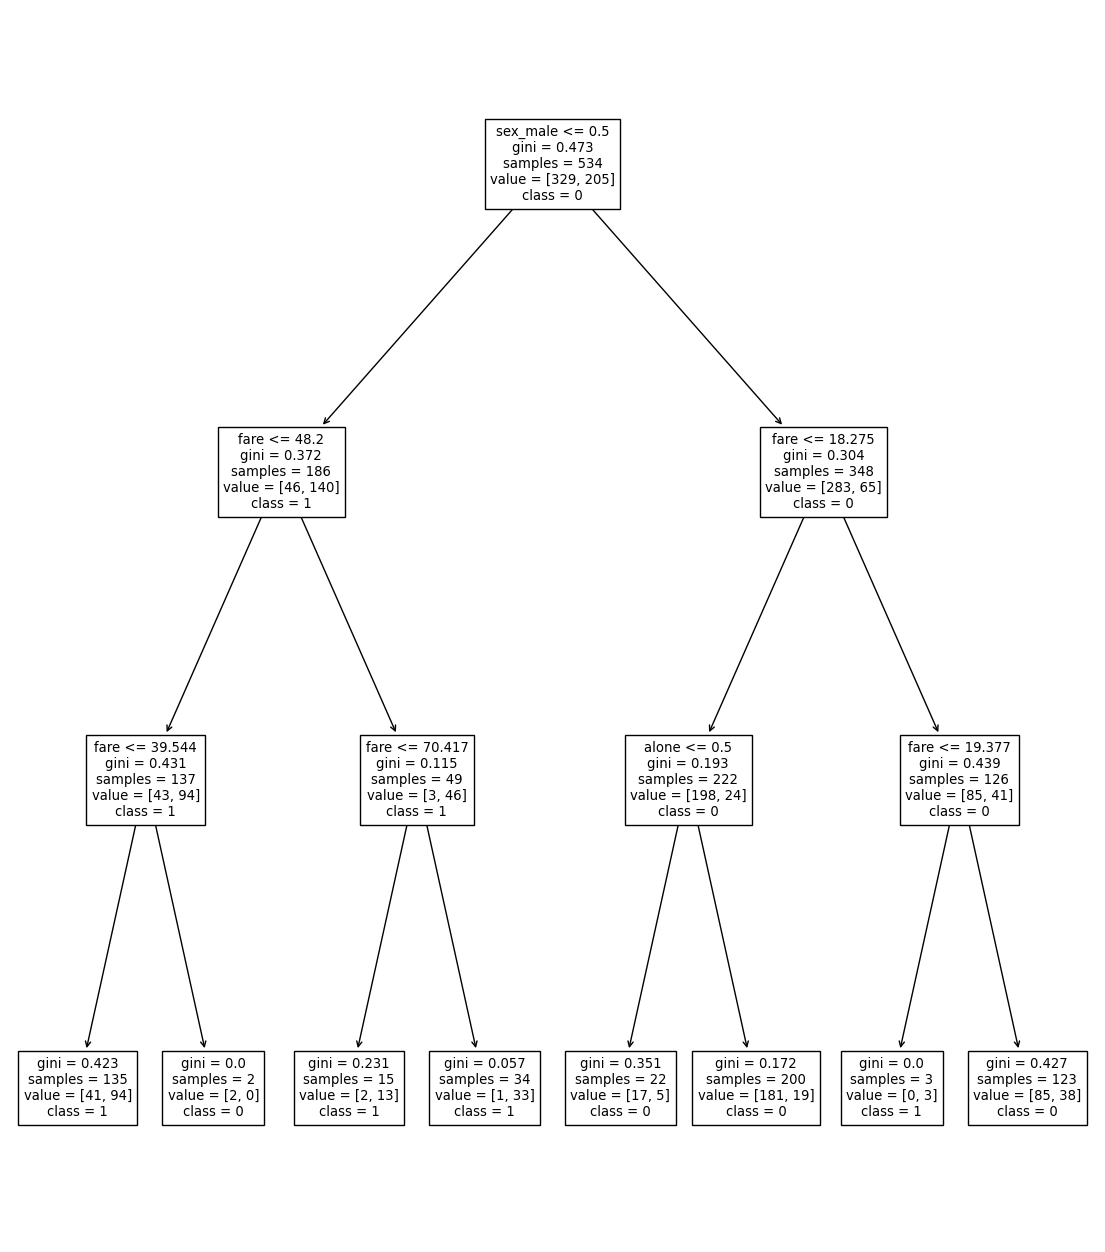

train data predict  0.8014981273408239
validate data predict  0.7640449438202247
     0    1
0  285   44
1   62  143


In [4]:
# finding columns code for changing

X_train = train[features]
X_validate = validate[features]
X_test = test[features]

target = 'survived'

y_train = train[target]
y_validate = validate[target]
y_test = test[validate]
              
tree2 = DecisionTreeClassifier(max_depth = 3)

tree2.fit(X_train, y_train)

training_predictability = tree2.score(X_train, y_train)

## the visual of the tests taking place
plt.figure(figsize = (14, 16))
plot_tree(tree2,
          feature_names = X_train.columns,
          class_names = tree2.classes_)
plt.show()

validate_predictability = tree2.score(X_validate, y_validate)

print('train data predict ', training_predictability)
print('validate data predict ', validate_predictability)

y_pred = tree2.predict(X_train)
y_pred



confusion_matrix(y_train, y_pred)

labels = sorted(y_train.unique())
labels

the_matrix = pd.DataFrame(confusion_matrix(y_train, y_pred), 
            index = labels,
            columns = labels)
print(the_matrix)

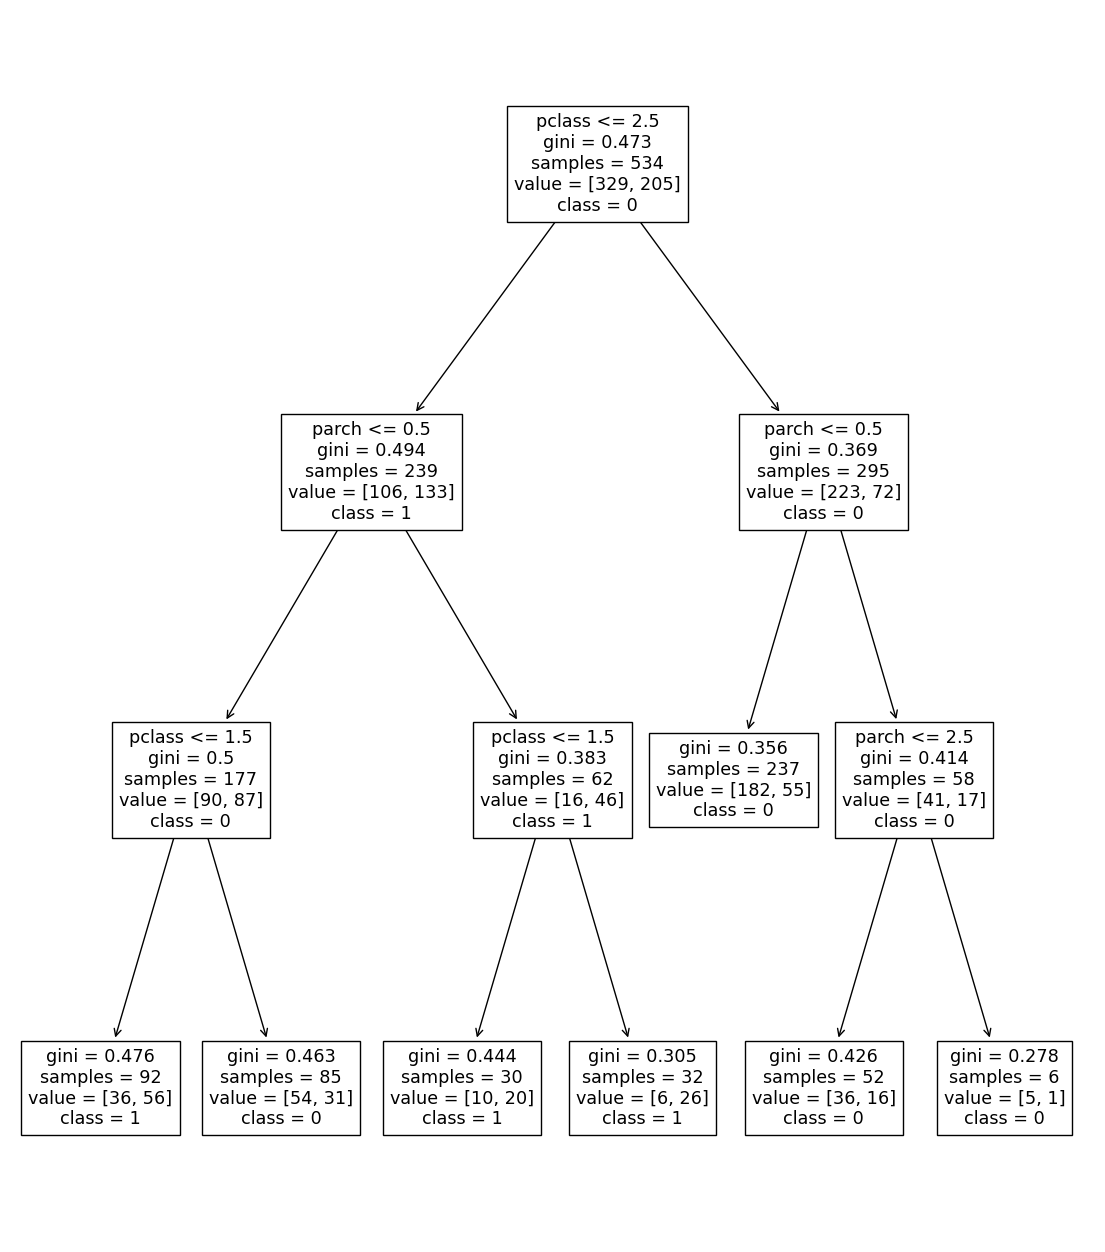

0.7097378277153558
0.702247191011236
     0    1
0  277   52
1  103  102


In [5]:
features = ['parch', 'pclass']
target = 'survived'
X_train = train[features]
X_validate = validate[features]
X_test = validate[features]

Y_train = train[target]
Y_validate = validate[target]
Y_test = test[target]

tree3= DecisionTreeClassifier(max_depth = 3)
tree3.fit(X_train, Y_train)

plt.figure(figsize=(14,16))
plot_tree(tree3,
          feature_names = X_train.columns,
            class_names = tree3.classes_
         )          
plt.show()

train_predict = tree3.score(X_train, Y_train)
validate_predict = tree3.score(X_validate, y_validate)
test_predict = tree3.score(X_validate, y_validate)

print(train_predict)
print(validate_predict)

y_pred = tree3.predict(X_train)
y_pred



confusion_matrix(y_train, y_pred)

labels = sorted(y_train.unique())
labels

the_matrix = pd.DataFrame(confusion_matrix(y_train, y_pred), 
            index = labels,
            columns = labels)
print(the_matrix)

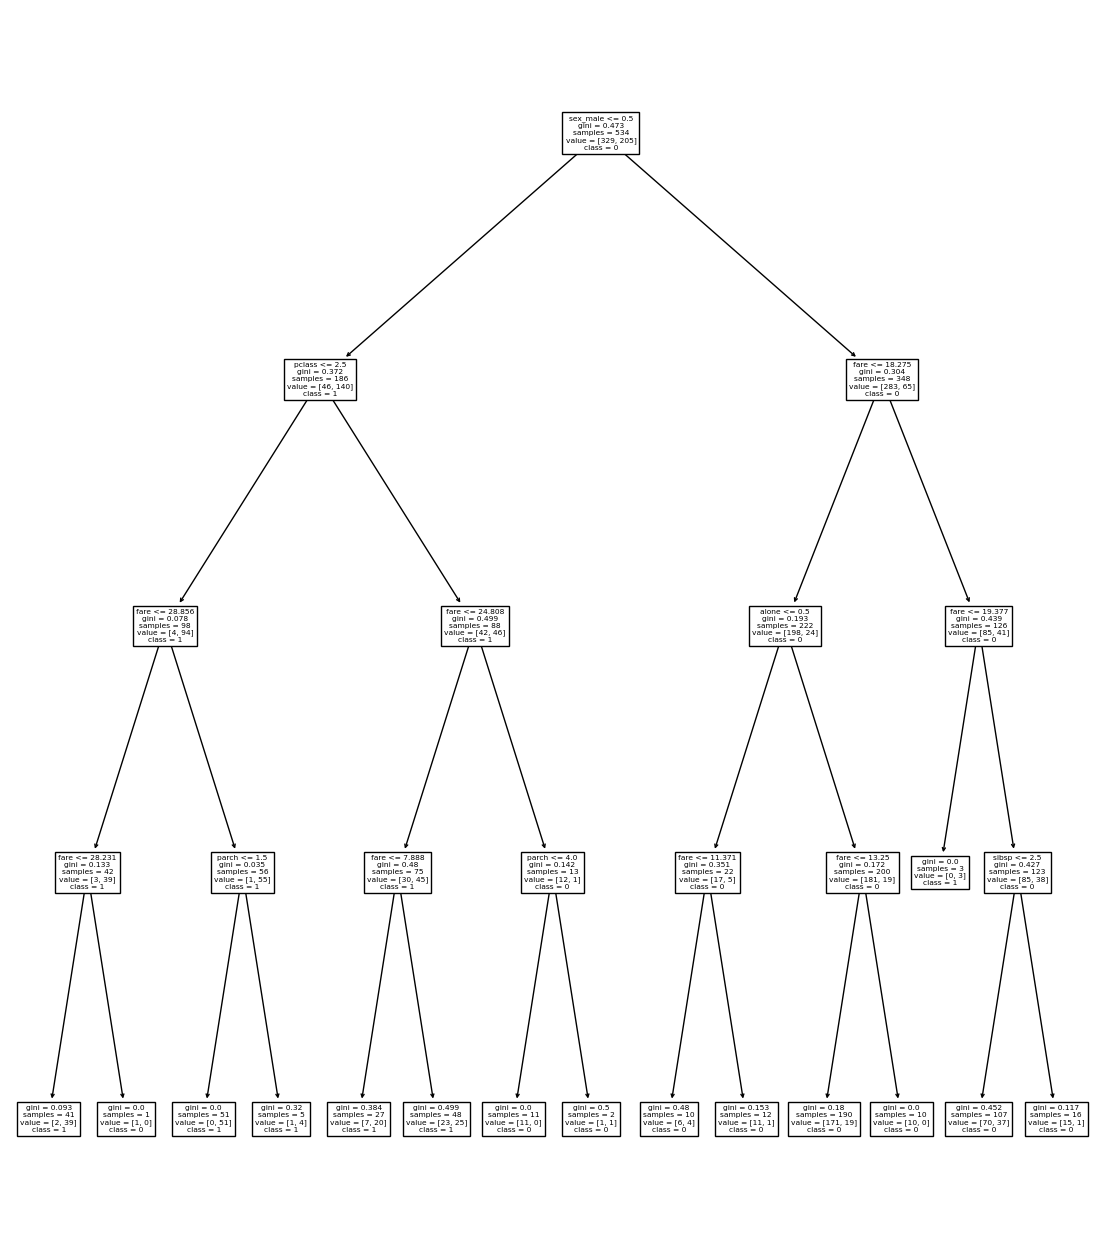

0.8202247191011236
0.7921348314606742
     0    1
0  296   33
1   63  142


In [6]:

target = 'survived'
X_train = train.iloc[:, 1:7]
X_validate = validate.iloc[:, 1:7]
X_test = validate.iloc[:, 1:7]

Y_train = train[target]
Y_validate = validate[target]
Y_test = test[target]

tree3= DecisionTreeClassifier(max_depth = 4)
tree3.fit(X_train, Y_train)

plt.figure(figsize=(14,16))
plot_tree(tree3,
          feature_names = X_train.columns,
            class_names = tree3.classes_
         )          
plt.show()

train_predict = tree3.score(X_train, Y_train)
validate_predict = tree3.score(X_validate, y_validate)
test_predict = tree3.score(X_validate, y_validate)

print(train_predict)
print(validate_predict)

y_pred = tree3.predict(X_train)
y_pred



confusion_matrix(y_train, y_pred)

labels = sorted(y_train.unique())
labels

the_matrix = pd.DataFrame(confusion_matrix(y_train, y_pred), 
            index = labels,
            columns = labels)
print(the_matrix)

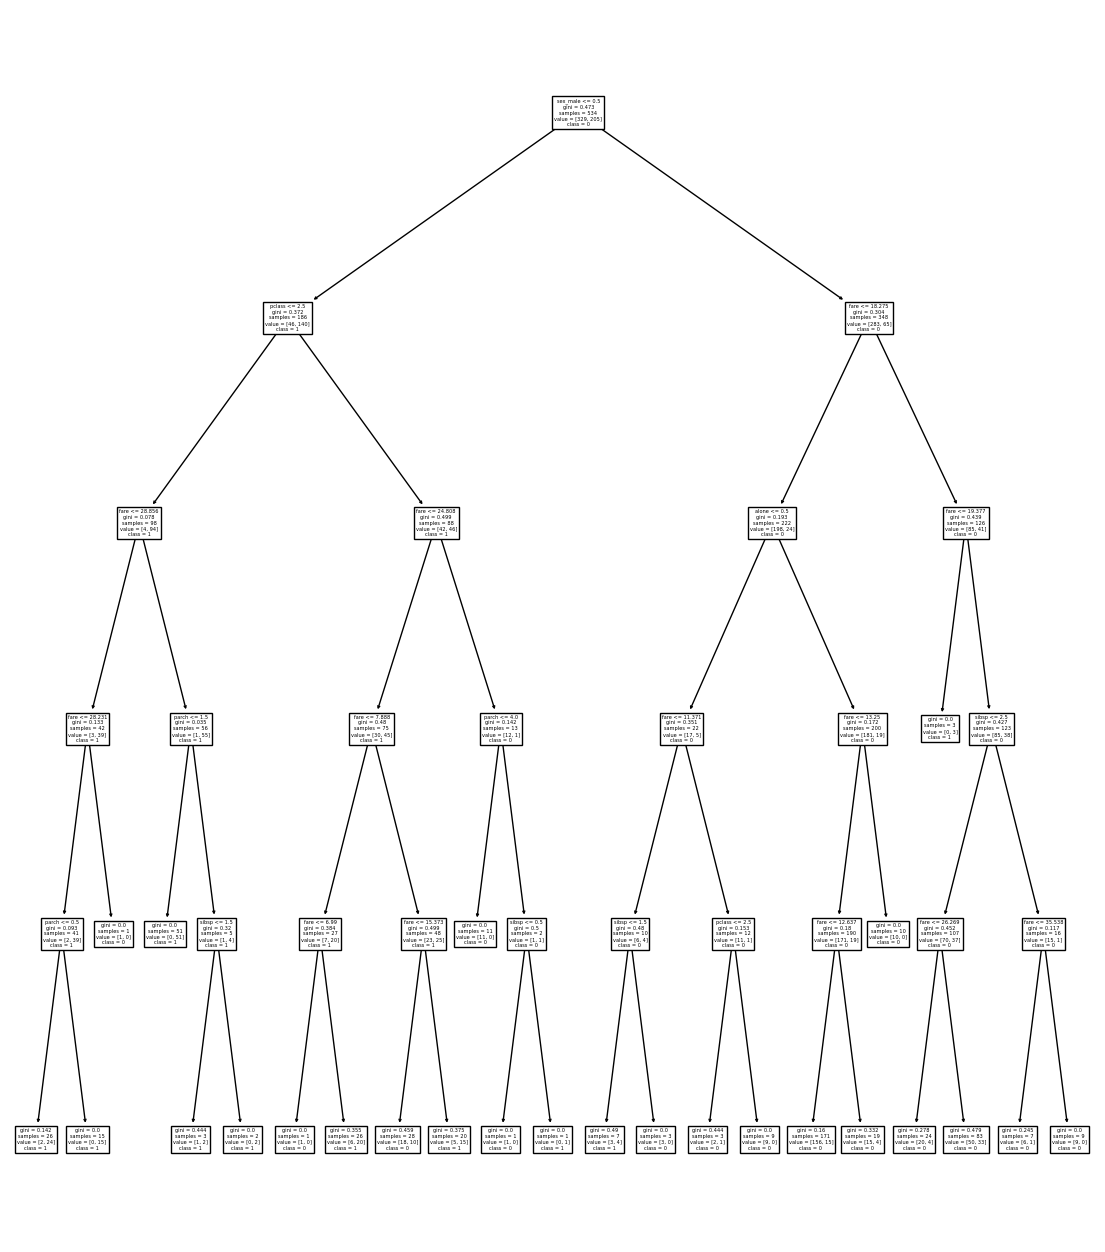

0.8408239700374532
0.7528089887640449
     0    1
0  312   17
1   68  137


In [7]:
target = 'survived'
X_train = train.iloc[:, 1:7]
X_validate = validate.iloc[:, 1:7]
X_test = validate.iloc[:, 1:7]

Y_train = train[target]
Y_validate = validate[target]
Y_test = test[target]

tree3= DecisionTreeClassifier(max_depth = 5)
tree3.fit(X_train, Y_train)

plt.figure(figsize=(14,16))
plot_tree(tree3,
          feature_names = X_train.columns,
            class_names = tree3.classes_
         )          
plt.show()

train_predict = tree3.score(X_train, Y_train)
validate_predict = tree3.score(X_validate, y_validate)
test_predict = tree3.score(X_validate, y_validate)

print(train_predict)
print(validate_predict)

y_pred = tree3.predict(X_train)
y_pred



confusion_matrix(y_train, y_pred)

labels = sorted(y_train.unique())
labels

the_matrix = pd.DataFrame(confusion_matrix(y_train, y_pred), 
            index = labels,
            columns = labels)
print(the_matrix)

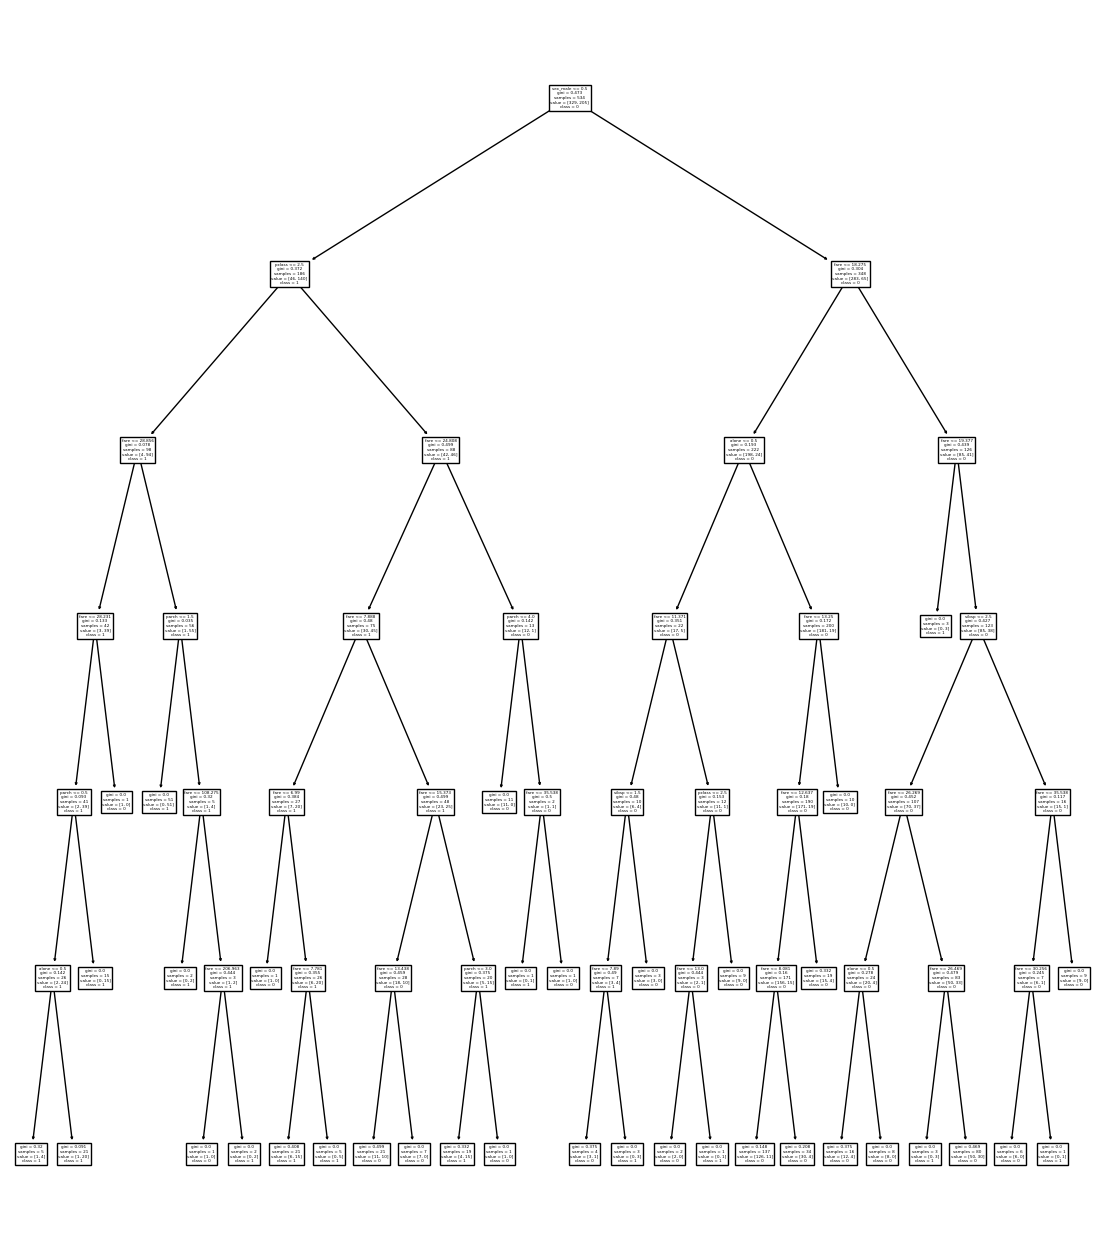

0.8576779026217228
0.7752808988764045
     0    1
0  317   12
1   64  141


In [8]:
target = 'survived'
X_train = train.iloc[:, 1:7]
X_validate = validate.iloc[:, 1:7]
X_test = validate.iloc[:, 1:7]

Y_train = train[target]
Y_validate = validate[target]
Y_test = test[target]

tree3= DecisionTreeClassifier(max_depth = 6)
tree3.fit(X_train, Y_train)

plt.figure(figsize=(14,16))
plot_tree(tree3,
          feature_names = X_train.columns,
            class_names = tree3.classes_
         )          
plt.show()

train_predict = tree3.score(X_train, Y_train)
validate_predict = tree3.score(X_validate, y_validate)
test_predict = tree3.score(X_validate, y_validate)

print(train_predict)
print(validate_predict)

y_pred = tree3.predict(X_train)
y_pred



confusion_matrix(y_train, y_pred)

labels = sorted(y_train.unique())
labels

the_matrix = pd.DataFrame(confusion_matrix(y_train, y_pred), 
            index = labels,
            columns = labels)
print(the_matrix)

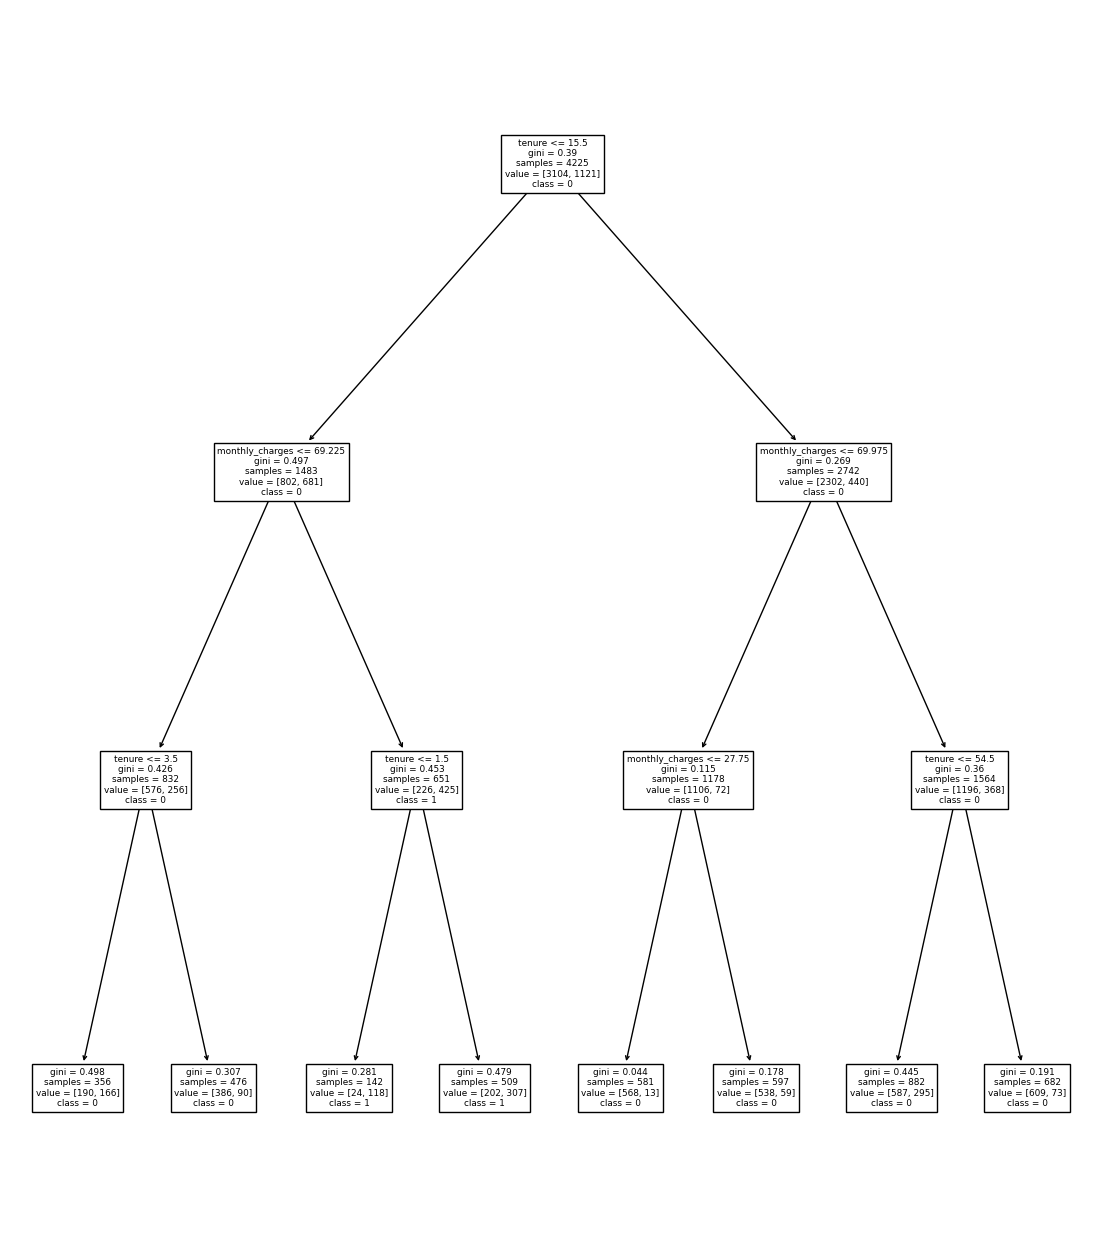

0.781775147928994
0.7856635911994322
0.7856635911994322


In [40]:
pd.set_option('display.max_columns', None)



df = acquire.get_telco_data()
df = prepare.prep_telco(df)
df['churn_Yes'] = df['churn_Yes'].astype(str)
train, validate, test = prepare.split_data(df, 'churn_Yes')


to_be_added_to_features = df.select_dtypes(include = ['int64', 'float64'])

to_be_added_to_features = to_be_added_to_features.T.drop_duplicates().T

df = df.T.drop_duplicates().T





target= 'churn_Yes'

X_train = train.iloc[:, 22:25]
X_validate = validate.iloc[:, 22:25]
X_test = test.iloc[:, 22:25]

y_train = train[target]
y_validate = validate[target]
y_test = test[target]


tree3= DecisionTreeClassifier(max_depth = 3)
tree3.fit(X_train, y_train)

plt.figure(figsize=(14,16))
plot_tree(tree3,
          feature_names = X_train.columns,
            class_names = tree3.classes_
         )          
plt.show()

train_predict = tree3.score(X_train, y_train)
validate_predict = tree3.score(X_validate, y_validate)
test_predict = tree3.score(X_validate, y_validate)

print(train_predict)
print(validate_predict)
print(test_predict)

# telco_DecisionTreeClassifier = DecisionTreeClassifier()
# telco_DecisionTreeClassifier.fit(X_train, y_train)